# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Aulia Dwi Yulianti
- **Email:** aulia.535220178@stu.untar.ac.id
- **ID Dicoding:** MC325D5X0765

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola permintaan penyewaan sepeda berdasarkan musim dan kondisi cuaca selama tahun 2011-2012?
- Pertanyaan 2: Pada jam berapa dan hari apa terjadi lonjakan tertinggi dalam penyewaan sepeda selama tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [24]:
#Memuat tabel DAY
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
#Memuat Tabel HOUR
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- File **day.csv** berisi data harian tentang penggunaan sistem bike-sharing yang didalamnya terdapat informasi seperti: **Tanggal, musim, hari libur atau bukan, serta kondisi cuaca**. Dengan menampilkan 5 baris pertama dari tabel, kita tetap bisa melihat informasi tersebut dengan baik.

- File **hour.csv** memiliki informasi serupa dengan day.csv, namun lebih rinci karena terdapat **data per jam**. Dengan menampilkan 5 baris pertama juga, kita bisa melihat ketersediaan sepeda pada waktu-waktu tertentu.

### Assessing Data

**DATASET DAY**

In [26]:
#Menampilkan ringkasan informasi dari DataFrame day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [27]:
#Memeriksa duplikasi dari DataFrame day_df
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**DATASET HOUR**

In [28]:
#Menampilkan ringkasan informasi dari DataFrame hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [29]:
#Memeriksa duplikasi dari DataFrame hour_df
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada dataset **day_df** Jumlah data pada day_df sudah benar, tidak terdapat missing value dan duplicate  data didalamnya. Namun terdapat Tipe data yang berbeda pada kolom **dteday** yang seharusnya diganti menjadi **datetime**.

- Sama seperti dataset day_df, di tabel **hour_df** juga tidak ada missing value dan duplicate data namun terdapat Tipe data yang berbeda pada kolom **dteday** harus diubah dengan **datetime** karena object digunakan untuk tipe data string.



### Cleaning Data

In [30]:
#Membersihkan data DAY dari TIPE DATA
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

#check
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [31]:
#Membersihkan data HOUR dari TIPE DATA
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

#check
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kode ini mengubah kolom **dteday** di dataset **day_df** menjadi **datetime**. Hal ini penting agar data dapat diproses dengan benar, terutama untuk analisis berbasis waktu seperti tren penyewaan sepeda berdasarkan hari, bulan, atau musim.
- Kode ini melakukan hal yang sama pada dataset **hour_df**, yaitu mengonversi kolom **dteday** menjadi format **datetime**. Dengan perubahan ini, analisis data per jam bisa dilakukan dengan lebih akurat, misalnya melihat pola penggunaan sepeda berdasarkan jam dan hari dalam seminggu.









## Exploratory Data Analysis (EDA)

### Explore ...

**DATASET DAY**

In [32]:
# Mengganti label kategori untuk musim dan kondisi cuaca
seasons = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
weathers = {1: "Cerah", 2: "Berawan", 3: "Hujan", 4: "Berkabut"}

day_df["season"] = day_df["season"].map(seasons)
day_df["weathersit"] = day_df["weathersit"].map(weathers)

# Menampilkan lima baris pertama setelah konversi
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,0,1,0,6,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,0,1,0,0,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan musim
season_avg = day_df.groupby("season")["cnt"].mean().sort_values(ascending=False)

print(season_avg)

season
Musim Gugur     5644.303191
Musim Panas     4992.331522
Musim Dingin    4728.162921
Musim Semi      2604.132597
Name: cnt, dtype: float64


In [34]:
# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan cuaca
weather_avg = day_df.groupby("weathersit")["cnt"].mean().sort_values(ascending=False)

print(weather_avg)

weathersit
Cerah      4876.786177
Berawan    4035.862348
Hujan      1803.285714
Name: cnt, dtype: float64


**Insight:**


*   Kode pertama **mengganti** label kategori dari angka 1-4 pada kolom musim dan kondisi cuaca **menjadi** label yang lebih mudah dipahami, seperti "Musim Panas" atau "Cerah".
*   Kode kedua **menghitung rata-rata** penyewaan sepeda untuk **setiap musim** dan menemukan bahwa musim dengan permintaan tertinggi adalah Musim Gugur atau Musim Panas.
*   Kode ketiga **menghitung rata-rata** penyewaan berdasarkan **kondisi cuaca** dan menunjukkan bahwa sepeda lebih banyak disewa saat cuaca cerah dibandingkan saat berawan atau hujan.

Hal ini menunjukkan bahwa faktor cuaca dan musim sangat memengaruhi jumlah penyewaan sepeda.

**DATASET HOUR**

In [35]:
#Mengganti label kategori untuk weekday
weekday_map = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5: "Sabtu", 6: "Minggu"}

#Mengurutkan hari dari senin ke minggu
order_hari = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

hour_df["weekday"] = hour_df["weekday"].map(weekday_map)

#Menampilkan lima baris pertama setelah konversi
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Minggu,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Minggu,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Minggu,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Minggu,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Minggu,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
# Menghitung rata-rata penyewaan sepeda per jam
hour_avg = hour_df.groupby("hr")["cnt"].mean()

print(hour_avg)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [37]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari dalam seminggu
day_avg = hour_df.groupby("weekday")["cnt"].mean()

print(day_avg)

weekday
Jumat     196.436665
Kamis     191.130505
Minggu    190.209793
Rabu      191.238891
Sabtu     196.135907
Selasa    183.744655
Senin     177.468825
Name: cnt, dtype: float64


**Insight:**


*   Kode pertama **mengganti** angka kategori pada kolom hari menjadi nama hari yang lebih mudah dipahami dan diurutkan, seperti "Senin" hingga "Minggu"
*   Kode kedua **menghitung rata-rata** penyewaan sepeda **berdasarkan jam** dan menunjukkan bahwa permintaan sepeda cenderung lebih tinggi pada jam-jam tertentu, seperti pagi dan sore hari, yang kemungkinan besar berhubungan dengan jam kerja atau aktivitas harian
*   Kode ketiga **menghitung rata-rata** penyewaan **berdasarkan hari dalam seminggu** dan dapat mengungkap pola bahwa akhir pekan atau hari kerja tertentu memiliki permintaan lebih tinggi.

Hal ini bisa menjadi informasi penting bagi pengelola layanan sepeda untuk mengatur stok sepeda di waktu-waktu dengan permintaan tertinggi.




## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola permintaan penyewaan sepeda berdasarkan musim dan kondisi cuaca selama tahun 2011-2012?

<ipython-input-38-3cdcaeb0f772>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg.index, y=season_avg.values, palette="coolwarm")


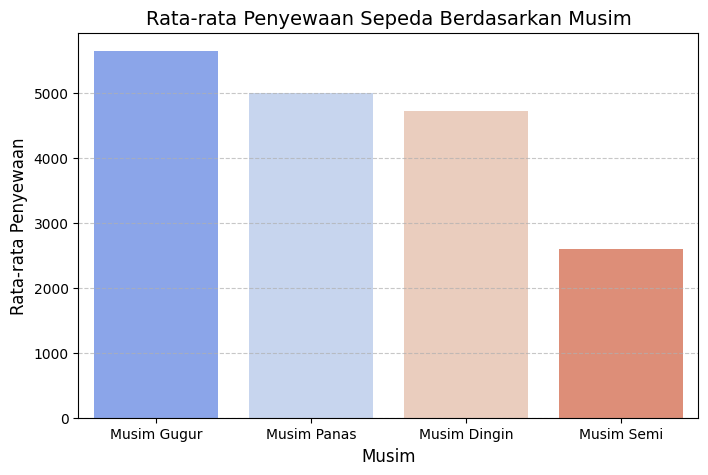

In [38]:
#Visualisasi penyewaan sepeda berdasarkan MUSIM
plt.figure(figsize=(8,5))
sns.barplot(x=season_avg.index, y=season_avg.values, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Insight:**

Berdasarkan visualisasi di atas, dapat dilihat grafik ini menunjukkan bahwa permintaan penyewaan sepeda tertinggi terjadi di musim gugur, diikuti oleh musim panas dan musim dingin, sedangkan musim semi memiliki permintaan terendah.

<ipython-input-39-4e280de14e46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_avg.index, y=weather_avg.values, palette="viridis")


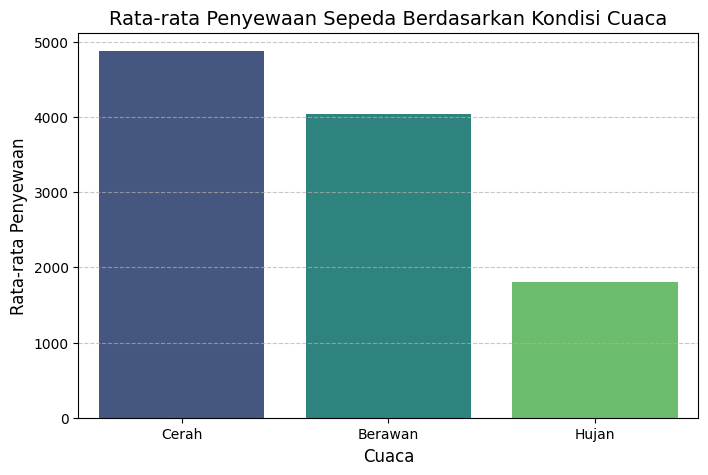

In [39]:
#Visualisasi penyewaan sepeda berdasarkan CUACA
plt.figure(figsize=(8,5))
sns.barplot(x=weather_avg.index, y=weather_avg.values, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=14)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**

Berdasarkan visualisasi di atas, dapat dilihat grafik ini menunjukkan bahwa penyewaan sepeda paling tinggi saat cuaca cerah, diikuti oleh cuaca berawan, sementara penyewaan menurun drastis saat hujan.

### Pertanyaan 2: Pada jam berapa dan hari apa terjadi lonjakan tertinggi dalam penyewaan sepeda selama tahun 2011-2012?

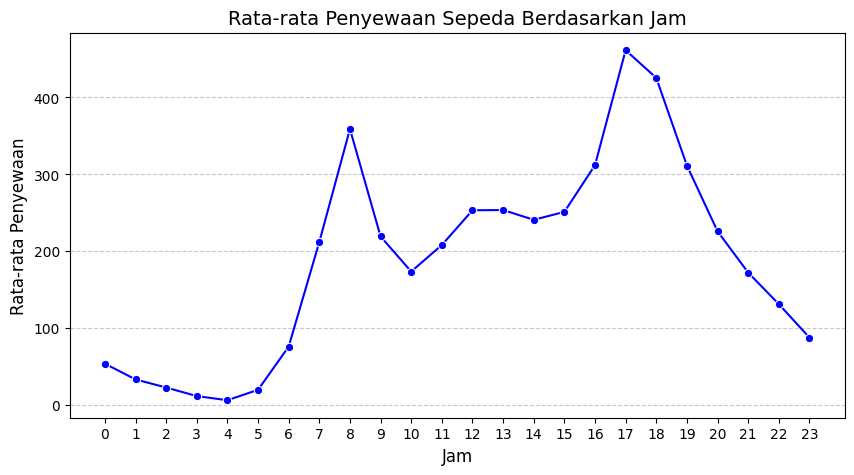

In [40]:
#Visualisasi penyewaan sepeda berdasarkan JAM
plt.figure(figsize=(10,5))
sns.lineplot(x=hour_avg.index, y=hour_avg.values, marker="o", color="blue")
plt.xticks(range(0,24))
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**

Berdasarkan visualisasi di atas, dapat dilihat grafik ini menunjukkan bahwa penyewaan sepeda memuncak pada pukul 08.00 dan 17.00-18.00, yang kemungkinan besar terjadi saat jam sibuk berangkat dan pulang kerja. Sementara itu, pada dini hari (00.00-05.00), jumlah penyewaan sangat rendah.

<ipython-input-41-1db004fcbbdf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_avg.index, y=day_avg.values, order=order_hari, palette="muted")


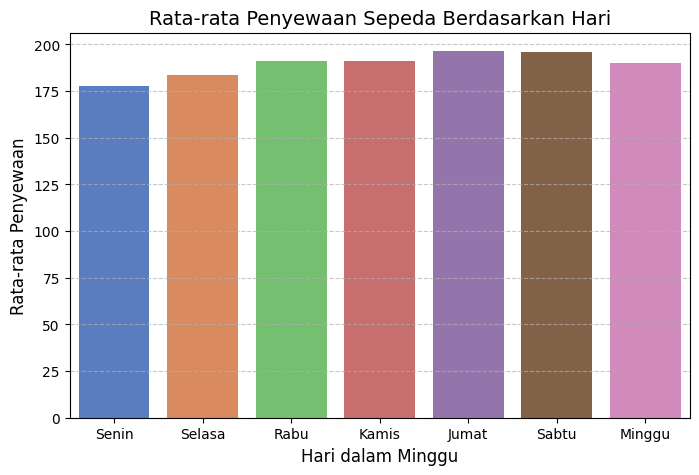

In [41]:
#Visualisasi penyewaan sepeda berdasarkan HARI dalam seminggu
plt.figure(figsize=(8,5))
sns.barplot(x=day_avg.index, y=day_avg.values, order=order_hari, palette="muted")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari", fontsize=14)
plt.xlabel("Hari dalam Minggu", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**

Berdasarkan visualisasi di atas, dapat dilihat grafik ini menunjukkan bahwa Penyewaan sepeda cenderung stabil sepanjang minggu, dengan sedikit peningkatan pada hari Jumat dan Sabtu.

## Analisis Lanjutan (Opsional)

**RULE BASED CLUSTERING**

clustering ini digunakan untuk menentukan kategori waktu penyewaan sepeda terbanyak berdasarkan jam

In [42]:
#Menentukan kategori waktu berdasarkan jam
def categorize_hour(hour):
    if 7 <= hour <= 9:
        return "Morning Hour"
    elif 10 <= hour <= 15:
        return "Regular Hours"
    elif 16 <= hour <= 21:
        return "Evening Hour"
    else:
        return "Off-Peak Hours"

#Terapkan fungsi pada dataset
hour_df["time_category"] = hour_df["hr"].apply(categorize_hour)

#Hitung rata-rata peminjaman di setiap kategori
time_avg = hour_df.groupby("time_category")["cnt"].mean().sort_values(ascending=False)

#Check
print(time_avg)


time_category
Evening Hour      318.198536
Morning Hour      263.461715
Regular Hours     230.192493
Off-Peak Hours     49.743534
Name: cnt, dtype: float64


**Insight:**


1.   Pada waktu **Pagi dan Sore** hari menunjukkan terdapat lonjakan penyewaan, dikarenakan banyak pengguna yang menggunakan sepeda untuk bepergian kerja maupun sekolah.
2.   Pada waktu **Regular** menunjukkan permintaan penyewaan yang stabil karena digunakan oleh pengguna hanya untuk keperluan lain.
3.   Pada waktu tidak sibuk atau **Off-Peak**, penyewaan sepeda cenderung lebih rendah, biasanya untuk meningkatkan pengguna di waktu ini, sistem diskon harga diaktifkan.


## Conclusion

- Conclution pertanyaan 1
  - Berdasarkan proses analisis data **kolom Musim pada day_df** yang sudah dilakukan, pola permintaan penyewaan sepeda tertinggi terjadi pada musim gugur. Sedangkan yang terendah itu musim semi, hal ini disebabkan oleh kondisi musim yang lebih nyaman dan stabil pada musim gugur.
  - Pola permintaan penyewaan sepeda berdasarkan data **kolom Cuaca pada day_df**, Cuaca cerah memiliki jumlah penyewaan sepeda tertinggi, yang diikuti oleh cuaca berawan. Pada cuaca hujan, penyewaan sepeda menurun, hal ini berarti cuaca sangat mempengaruhi permintaan.

Kesimpulannya, Orang lebih banyak menyewa sepeda saat cuaca cerah, terutama di musim gugur dan musim panas. Saat hujan, jumlah penyewaan turun drastis.Strategi penyewaan bisa disesuaikan, misalnya menyediakan layanan tambahan seperti jas hujan atau promosi di musim dengan penyewaan lebih rendah.


- Conclution pertanyaan 2
  - Terdapat **lonjakan tinggi pada Jam sibuk (Peak Hours)** dari pukul 07.00 - 09.00 pagi dan 17.00 - 19.00 sore untuk digunakan berangkat kerja atau sekolah menghindari kemacetan serta peningkatan pengguna transportasi umum lainnya.
  - **Lonjakan tinggi juga terjadi pada hari-hari kerja dan akhir pekan** atau sepanjang hari untuk berwisata atau olahraga, pengguna di hari santai lebih sedikit karena biasanya menyewa sepeda di luar jam sibuk.

Kesimpulannya, Penyewaan paling tinggi terjadi saat jam berangkat dan pulang kerja/sekolah pada hari kerja. Di akhir pekan, banyak orang menyewa sepeda untuk rekreasi, dan penyewaannya lebih merata sepanjang hari. Strategi bisnis bisa disesuaikan, misalnya menyediakan lebih banyak sepeda di jam sibuk atau memberikan promo di akhir pekan untuk menarik lebih banyak pengguna rekreasi.

In [43]:
all_df = pd.merge(day_df, hour_df, on='dteday', how='inner')

In [44]:
all_df.to_csv("all_data.csv", index=False)